In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

585

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e9b953928c58fce60b6f8dace00361b7


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    #Run an API request for each of the cites 
    try:
    #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
     #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
    #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
    #Append the city information into city_data list
        city_data.append({'City': city.title(),
                        'Lat': city_lat, 
                        'Lng': city_lng, 
                        'Max Temp': city_max_temp, 
                        'Humidity': city_humidity, 
                        'Cloudiness': city_clouds, 
                        'Wind Speed': city_wind, 
                        'Country': city_country, 
                        'Date': city_date})
    
#If an error is experienced, skip the city
    except: 
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | coreau
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | geraldton
Processing Record 4 of Set 1 | tautira
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | puerto carreno
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | kurunegala
Processing Record 9 of Set 1 | port hedland
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | samusu
City not found. Skipping...
Processing Record 13 of Set 1 | aquiraz
Processing Record 14 of Set 1 | dickinson
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | la orilla
Processing Record 19 of Set 1 | lavrentiya
Processing Record 20 of Set 1 | mount isa
Processing Record 21 of Set 1 | capoterra
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | jamestown
Processing Recor

Processing Record 42 of Set 4 | havre-saint-pierre
Processing Record 43 of Set 4 | zhigansk
Processing Record 44 of Set 4 | daru
Processing Record 45 of Set 4 | gizo
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | shimoda
Processing Record 48 of Set 4 | bengkulu
Processing Record 49 of Set 4 | nishihara
Processing Record 50 of Set 4 | saleaula
City not found. Skipping...
Processing Record 1 of Set 5 | havoysund
Processing Record 2 of Set 5 | kautokeino
Processing Record 3 of Set 5 | makakilo city
Processing Record 4 of Set 5 | nemuro
Processing Record 5 of Set 5 | yermish
Processing Record 6 of Set 5 | praia da vitoria
Processing Record 7 of Set 5 | bridlington
Processing Record 8 of Set 5 | kavieng
Processing Record 9 of Set 5 | nova olinda do norte
Processing Record 10 of Set 5 | narsaq
Processing Record 11 of Set 5 | bambous virieux
Processing Record 12 of Set 5 | husavik
Processing Record 13 of Set 5 | rumonge
Processing Record 14 of Set 5 | dinsor
City

Processing Record 27 of Set 8 | thompson
Processing Record 28 of Set 8 | naze
Processing Record 29 of Set 8 | jalu
Processing Record 30 of Set 8 | saint-joseph
Processing Record 31 of Set 8 | maragogipe
Processing Record 32 of Set 8 | alvaraes
Processing Record 33 of Set 8 | illapel
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | grand gaube
Processing Record 36 of Set 8 | bar harbor
Processing Record 37 of Set 8 | mamallapuram
Processing Record 38 of Set 8 | olafsvik
Processing Record 39 of Set 8 | japura
Processing Record 40 of Set 8 | komsomolskiy
Processing Record 41 of Set 8 | havelock
Processing Record 42 of Set 8 | inirida
Processing Record 43 of Set 8 | margate
Processing Record 44 of Set 8 | comodoro rivadavia
Processing Record 45 of Set 8 | pacific grove
Processing Record 46 of Set 8 | ilulissat
Processing Record 47 of Set 8 | mogadishu
Processing Record 48 of Set 8 | svarstad
Processing Record 49 of Set 8 | boende
Processing Record 50 of Set 8 | kota 

Processing Record 17 of Set 12 | aswan
Processing Record 18 of Set 12 | simao
Processing Record 19 of Set 12 | taiyuan
Processing Record 20 of Set 12 | adolfo ruiz cortines
Processing Record 21 of Set 12 | canutama
Processing Record 22 of Set 12 | pleasanton
Processing Record 23 of Set 12 | lusambo
Processing Record 24 of Set 12 | luang prabang
Processing Record 25 of Set 12 | merida
Processing Record 26 of Set 12 | apatou
Processing Record 27 of Set 12 | sao joao da barra
Processing Record 28 of Set 12 | nyurba
Processing Record 29 of Set 12 | erzin
Processing Record 30 of Set 12 | pangnirtung
Processing Record 31 of Set 12 | mayo
Processing Record 32 of Set 12 | brigantine
Processing Record 33 of Set 12 | porto novo
Processing Record 34 of Set 12 | brookings
Processing Record 35 of Set 12 | namibe
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
len(city_data)

539

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coreau,-3.5333,-40.6567,82.06,61,43,3.56,BR,2021-07-18 21:15:25
1,Mataura,-46.1927,168.8643,41.70,97,94,1.97,NZ,2021-07-18 21:15:25
2,Geraldton,-28.7667,114.6000,56.12,94,90,0.00,AU,2021-07-18 21:15:25
3,Tautira,-17.7333,-149.1500,73.42,87,100,28.50,PF,2021-07-18 21:15:26
4,New Norfolk,-42.7826,147.0587,48.70,84,100,2.98,AU,2021-07-18 21:15:26
5,Puerto Carreno,6.1890,-67.4859,83.39,68,38,6.87,CO,2021-07-18 21:15:26
6,Tiksi,71.6872,128.8694,42.53,75,100,4.90,RU,2021-07-18 21:15:26
7,Kurunegala,7.4863,80.3623,74.37,91,90,6.26,LK,2021-07-18 21:15:27
8,Port Hedland,-20.3167,118.5667,57.25,54,0,5.75,AU,2021-07-18 21:15:27
9,Mar Del Plata,-38.0023,-57.5575,50.09,49,89,11.99,AR,2021-07-18 21:10:28


In [13]:
# re-order the dataframe columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coreau,BR,2021-07-18 21:15:25,-3.5333,-40.6567,82.06,61,43,3.56
1,Mataura,NZ,2021-07-18 21:15:25,-46.1927,168.8643,41.70,97,94,1.97
2,Geraldton,AU,2021-07-18 21:15:25,-28.7667,114.6000,56.12,94,90,0.00
3,Tautira,PF,2021-07-18 21:15:26,-17.7333,-149.1500,73.42,87,100,28.50
4,New Norfolk,AU,2021-07-18 21:15:26,-42.7826,147.0587,48.70,84,100,2.98


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

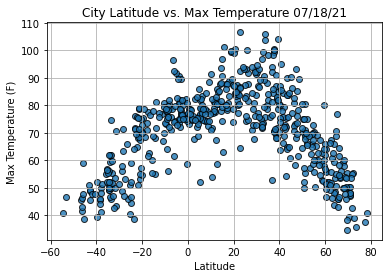

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/city_latitude_vs_max_temperature.png")

# Show plot.
plt.show()

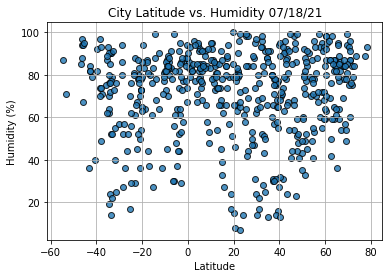

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/city_latitude_vs_humidity.png")
# Show plot.
plt.show()

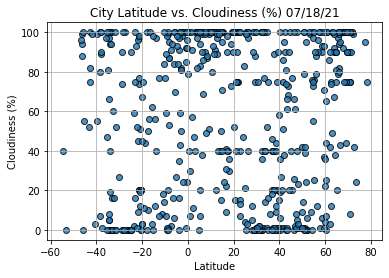

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/city_latitude_vs_cloudiness.png")
# Show plot.
plt.show()

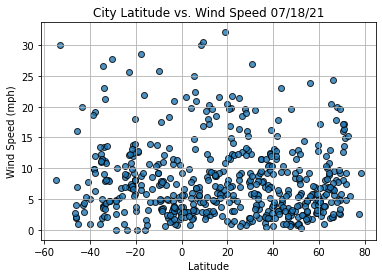

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/city_latitude_vs_wind_speed.png")
# Show plot.
plt.show()